# **Graphs**

Now that we are familiar with binary trees, let's talk about the bigger picture: graphs.

A graph is any collection of nodes and connections between those nodes.

    Another term for nodes is vertices, and the connections between the nodes are called edges.

Remember that a binary tree is a graph, it just has a lot of restrictions on it. The most prominent ones are that every node has at most one parent and at most two children. When we lift the restrictions, graphs can take many more forms.

Graphs are part of our everyday lives. Without even trying too hard, you can model literally anything as a graph. Some examples of practical applications would be social networks like Facebook, Twitter, Instagram, and TikTok, the roads in cities, circuit boards, internet network traffic, crypto blockchains, models in biology, and so much more.

# Graph terminology


Before we dive in, you will first need to become familiar with some graph terminology.

Edges of a node can either be directed or undirected. Directed edges mean that you can only traverse in one direction. If you're at node A and there is a directed edge to node B, you can move from A -> B, but once you're at B you can't move B -> A. In graphical representations, directed edges will be arrows between nodes. Undirected edges mean that you can traverse in both directions. So using the same example, you can move from A -> B and B -> A. In graphical representations, undirected edges will just be straight lines between nodes.

    In binary trees, the edges were directed. Binary trees are directed graphs. You can't access a node's parent, only its children. Once you move to a child, you can't move back.



Another important term is connected component. A connected component of a graph is a group of nodes that are connected by edges. In the first and third graphs shown in the animation above, there is only one connected component. In the second graph, there are three connected components.

    In binary trees, there must only be one connected component (all nodes are reachable from the root).

A node can have any number of edges connected to it. If we have a directed graph, it can have any number of edges leaving it and any number of edges entering it. The number of edges that can be used to reach the node is the node's **indegree**. The number of edges that can be used to leave the node is the node's **outdegree**. Nodes that are connected by an edge are called **neighbors**. So if you have a graph like A <-> B <-> C, A is neighbors with B, B is neighbors with A and C, and C is neighbors with B.

    In binary trees, all nodes except the root had an indegree of 1 (due to their parent). All nodes have an outdegree of 0, 1, or 2. An outdegree of 0 means that it is a leaf. Specific to trees, we used the parent/child terms instead of "neighbors".

A graph can be either cyclic or acyclic. Cyclic means that the graph has a cycle, acyclic means that it doesn't. We learned what a cycle was in the linked list chapter - it's when you have a path in the edges that leads to visiting the same nodes infinitely. Here's an example of a graph with and without a cycle:

    Binary trees by definition cannot have a cycle.

# How are graphs given in algorithm problems?

In linked list problems, the head of the linked list is given. In binary tree problems, the root of the tree is given. In graph problems, only information about a graph is given. There are multiple common formats that this information can come in. We will take a look at a few.

    An important thing to understand is that with linked lists and binary trees, you are literally given objects in memory that contain data and pointers. With graphs, the graph doesn't literally exist in memory.

    In fact, only the "idea" of the graph exists. The input will give you some information about it, and it's up to you to figure out how to represent and traverse the graph with code.

    Many times, the nodes of a graph will be labeled from 0 to n - 1. The problem statement may or may not explicitly state the input is a graph. Sometimes there might be a story, and you need to determine that the input is a graph. For example, "there are n cities labeled from 0 to n - 1". You can treat each city as a node and each city has a unique label.

With binary trees, traversal was easy because at any given node, we only needed to reference node.left and node.right. This allowed us to focus only on the traversal (with DFS or BFS). With graphs, a node can have any number of neighbors. Before we start our traversal, we usually need to do some work to make sure that for any given node, we can immediately access all the neighbors of said node.

What do we mean by this? This is best explained with an example.

# First input format: array of edges



In this input format, the input will be a 2D array. Each element of the array will be in the form [x, y], which indicates that there is an edge between x and y. The problem may have a story for these edges - using the cities example, the story would be something like "[x, y] means there is a highway connecting city x and city y".

    The edges could be directed or undirected. This information will be in the problem description.

So, why can't we immediately start traversal? Let's say that we want to start a DFS from node 0 (sometimes the problem will state which node you should start from, sometimes you will need to figure this out yourself). When we're at node 0, how do we find the neighbors? We would need to iterate over the entire input to find all edges that include 0. When we move to a neighbor node, we would need to iterate over the entire input again to find all the neighbors of that node

**At every node, we would need to iterate over the entire input to find the neighbors**. This is very slow!

Before starting the traversal, we can pre-process the input so that we can easily find all neighbors of any given node. Ideally, you want a data structure where you can give node as an argument and be returned a list of neighbors. The easiest way to accomplish this is using a hash map.

Let's say you had a hash map graph that mapped integers to lists of integers. We can iterate over the input and for each [x, y] pair, we can put y in the list associated with graph[x]. If the edges are undirected, we will also need to put x in the list associated with graph[y]. After building this hash map, we can do graph[0] and immediately have all the neighbors of node 0.

A good analogy for this: imagine you're on Facebook and you want to see a list of all your friends. However, the Facebook engineers decided to keep their graph in the form of an array of edges! You would need to look at **every single connection** in the world (which is likely in the hundreds of billions if not trillions) and find the connections that involve you. However, if the graph is built beforehand, you can easily just click the friends tab on your profile to see only your friends.

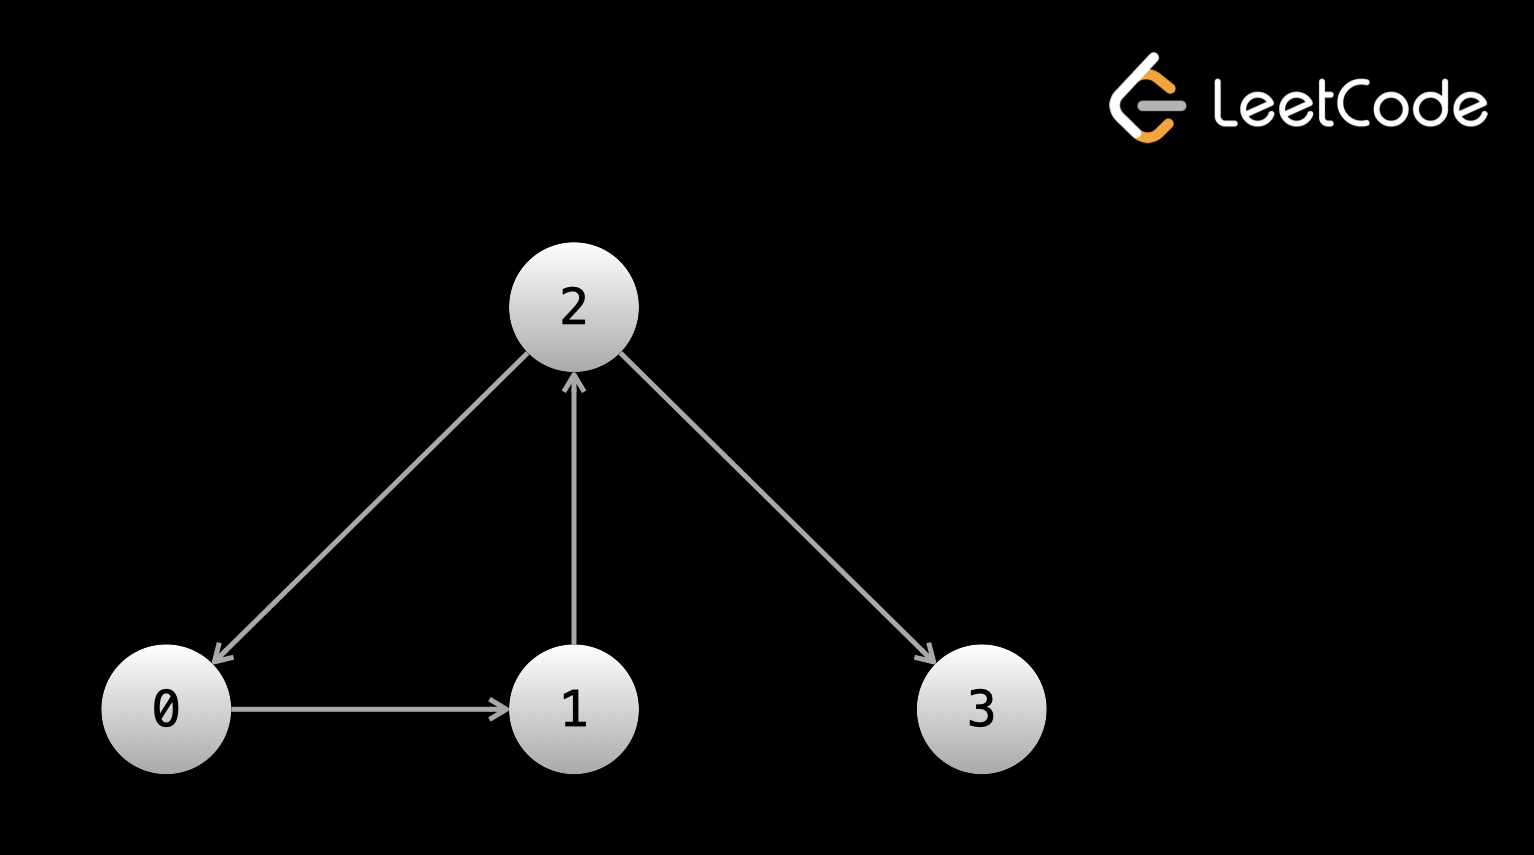

This example graph can be represented by an array of directed edges: edges = [[0, 1], [1, 2], [2, 0], [2, 3]].

    Notice that the graph in the image does not exist in memory. It exists only as an idea derived from the array [[0, 1], [1, 2], [2, 0], [2, 3]].

Here's some example code for building graph from an array of edges:

In [ ]:
from collections import defaultdict

def build_graph(edges):
    graph = defaultdict(list)
    for x, y in edges:
        graph[x].append(y)
        # graph[y].append(x)
        # uncomment the above line if the graph is undirected
    
    return graph